### Import all the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
import imblearn
from  imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , BaggingClassifier 
from sklearn.ensemble import ExtraTreesClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
import pickle

### Load the dataset

In [2]:
data = pd.read_csv('_BANKRUPTCY PREDICTION .csv')

### Read first 5 data from the dataset

In [3]:
data.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


### Shape of the dataset

In [4]:
data.shape

(6819, 95)

### Information about the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

### Check whether dataset has null values or not

In [6]:
data.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Bankrupt                                                    0
Length: 95, dtype: int64

### Check whether dataset has duplicate records

In [7]:
data.duplicated().sum()

0

### Statistical description of the dataset

In [8]:
data.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.047578,0.032263
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.050014,0.176710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.024477,0.000000
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.033798,0.000000
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.052838,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Count of unique values of the target column('Bankrupt')

In [9]:
data['Bankrupt'].value_counts()

0    6599
1     220
Name: Bankrupt, dtype: int64

### Check dataset is balanced or imbalanced 

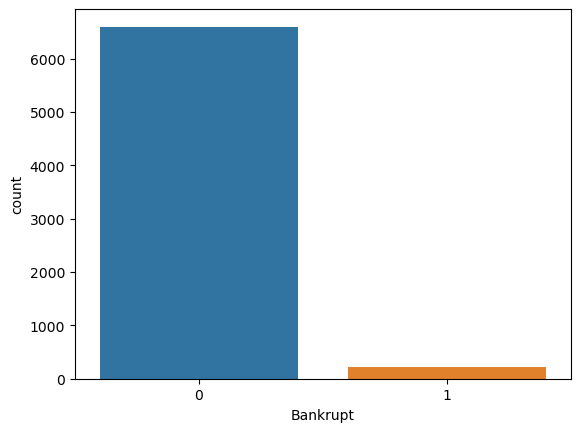

In [10]:
sns.countplot('Bankrupt',data=data)
plt.show()

### Split the dataset into independent variables as x and dependent variables as y

In [11]:
x = data.drop('Bankrupt', axis=1)
y = data['Bankrupt']

### Standardizing the dataset

In [12]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)
x_sc

array([[-2.21790935e+00, -2.04579778e+00, -2.40036101e+00, ...,
        -6.00306935e-02, -9.89778824e-02, -6.22067290e-01],
       [-6.73828200e-01, -3.11067860e-01, -5.98449686e-01, ...,
         1.51298163e+01,  3.64558671e-01, -5.35573373e-01],
       [-1.30367191e+00, -9.08419777e-01, -1.31990960e+00, ...,
        -6.29611592e-02, -1.25015039e-01, -6.21959851e-01],
       ...,
       [-5.34844815e-01, -3.79194235e-01, -5.34995985e-01, ...,
        -4.78695575e-02, -1.51012998e-02,  1.00120639e+00],
       [ 1.78751732e-02,  1.95942517e-02,  7.40278436e-03, ...,
        -4.58978074e-02, -4.27044627e-03, -7.13638481e-02],
       [-1.99838656e-01,  1.74955601e-01, -6.56124393e-02, ...,
        -4.77549201e-02, -1.44543744e-02,  3.72572885e+00]])

### Balancing the dataset using SMOTE(Synthetic Minority Oversampling Technique)

In [13]:
smote = SMOTE()
x_smote , y_smote = smote.fit_resample(x_sc , y)
print(x_smote.shape)
print(y_smote.shape)

(13198, 94)
(13198,)


### Dimensionality reduction(Reducing variables) using PCA(Principle Component Analysis)

In [14]:
pca = PCA(n_components = 0.95)
pca.fit(x_smote)
x_pca = pca.transform(x_smote)
x_pca.shape

(13198, 46)

### Splitting balanced dataset into training and testing set

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_smote, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(10558, 46)
(2640, 46)
(10558,)
(2640,)


### Creating instances of models

In [16]:
lr = LogisticRegression()
svc = SVC(kernel = 'rbf')
gnb = GaussianNB()
dtc = DecisionTreeClassifier(criterion = 'entropy')
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
rfc = RandomForestClassifier(n_estimators = 60, criterion = 'entropy',random_state = 0)
adc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()

### Creating dictionaries 

In [17]:
clfs = {
    'Logistic Regression' : lr,
    'Support Vector Classifier' : svc,
    'Naive Bayes' : gnb,
    'Decision Tree' : dtc,
    'K-Nearest Neighbour' : knn,
    'Random Forest Classifier' : rfc,
    'Ada Boost Classifier' : adc,
    'Bagging Classifier' : bc,
    'Extra Trees Classifier' : etc,
    'Gradient Boost' : gbc,
    'XGBoost' : xgb
    
}

### Creating function to train and test the models

In [18]:
def train_classifier(clf , x_train , y_train , x_test , y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test , y_pred)
    precision = precision_score(y_test , y_pred)
    conf_matrix = confusion_matrix(y_test , y_pred)
    TP = conf_matrix[0][0]
    FN = conf_matrix[0][1]
    FP = conf_matrix[1][0]
    TN = conf_matrix[1][1]
    
    return accuracy , precision , TP , FN , FP , TN

### Training , testing and finding the accuracy , precision and confusion matrix of the models  

In [19]:
accuracy_scores= []
precision_scores= []
True_Positive = []
False_Negative = []
False_Positive = []
True_Negative = []

for name , clf in clfs.items():
    new_accuracy ,new_precision ,new_TP ,new_FN ,new_FP ,new_TN = train_classifier(clf ,
                                                                                   x_train , y_train ,
                                                                                   x_test , y_test)
    
    print("For" , name)
    print("Accuracy - " , new_accuracy)
    print("Precision - " , new_precision)
    print("True_Positive - " , new_TP)
    print("False_Negative - " , new_FN)
    print("False_Positive - " , new_FP)
    print("True_Negative - " , new_TN)
    print('\n')
    
    accuracy_scores.append(new_accuracy)
    precision_scores.append(new_precision)
    True_Positive.append(new_TP)
    False_Negative.append(new_FN)
    False_Positive.append(new_FP)
    True_Negative.append(new_TN)

For Logistic Regression
Accuracy -  0.8893939393939394
Precision -  0.8823529411764706
True_Positive -  1103
False_Negative -  166
False_Positive -  126
True_Negative -  1245


For Support Vector Classifier
Accuracy -  0.9261363636363636
Precision -  0.9032921810699589
True_Positive -  1128
False_Negative -  141
False_Positive -  54
True_Negative -  1317


For Naive Bayes
Accuracy -  0.7318181818181818
Precision -  0.6878186968838527
True_Positive -  718
False_Negative -  551
False_Positive -  157
True_Negative -  1214


For Decision Tree
Accuracy -  0.9473484848484849
Precision -  0.9387464387464387
True_Positive -  1183
False_Negative -  86
False_Positive -  53
True_Negative -  1318


For K-Nearest Neighbour
Accuracy -  0.9458333333333333
Precision -  0.9055482166446499
True_Positive -  1126
False_Negative -  143
False_Positive -  0
True_Negative -  1371


For Random Forest Classifier
Accuracy -  0.9818181818181818
Precision -  0.9714896650035638
True_Positive -  1229
False_Negative 

### Creating the dataframe which has Algorithms used for training along with their accuracy score , precision score and confusion matrix 

In [20]:
performance_data = pd.DataFrame({'Algorithms' : clfs.keys() , 
                                 'True_Positive' : True_Positive , 
                                 'False_Negative' : False_Negative,
                                 'False_Positive' : False_Positive,
                                 'True_Negative' : True_Negative,
                                 'Accuracy' : accuracy_scores ,
                                 'Precision' : precision_scores}).sort_values('Precision' , ascending = False)
performance_data

,Algorithms,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision
8,Extra Trees Classifier,1251,18,3,1368,0.992045,0.987013
10,XGBoost,1229,40,3,1368,0.983712,0.971591
5,Random Forest Classifier,1229,40,8,1363,0.981818,0.971490
7,Bagging Classifier,1218,51,34,1337,0.967803,0.963256
3,Decision Tree,1183,86,53,1318,0.947348,0.938746
9,Gradient Boost,1170,99,35,1336,0.949242,0.931010
6,Ada Boost Classifier,1160,109,133,1238,0.908333,0.919079
4,K-Nearest Neighbour,1126,143,0,1371,0.945833,0.905548
1,Support Vector Classifier,1128,141,54,1317,0.926136,0.903292
0,Logistic Regression,1103,166,126,1245,0.889394,0.882353


### Extra Trees Classifier gives best result compared to other classifiers.

In [21]:
pickle.dump(etc , open('model.pkl' , 'wb'))